In [138]:
from deepforest import main
from deepforest import get_data
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
model = main.deepforest()

Reading config file: /home/danny/anaconda3/lib/python3.9/site-packages/deepforest/data/deepforest_config.yml


In [139]:
m = main.deepforest()

Reading config file: /home/danny/anaconda3/lib/python3.9/site-packages/deepforest/data/deepforest_config.yml


In [140]:
m.config

{'workers': 1,
 'gpus': None,
 'distributed_backend': None,
 'batch_size': 1,
 'nms_thresh': 0.05,
 'score_thresh': 0.1,
 'train': {'csv_file': None,
  'root_dir': None,
  'lr': 0.001,
  'epochs': 1,
  'fast_dev_run': False},
 'validation': {'csv_file': None, 'root_dir': None, 'iou_threshold': 0.4}}

In [141]:
m.use_release()

Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


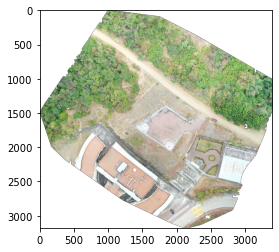

In [142]:
imgpath = "Mosaicos/bosqueed.tif"#get_data("OSBS_029.png")
image = img.imread(imgpath)
plt.imshow(image)
plt.show()

In [143]:
box = m.predict_image(path=imgpath, return_plot=False)#, color=(10, 10, 10), thickness=20)

In [144]:
box.head()

,xmin,ymin,xmax,ymax,label,score
0,47.0,1358.0,406.0,1769.0,Tree,0.142108
1,548.0,1158.0,769.0,1378.0,Tree,0.137820
2,2589.0,961.0,3268.0,1599.0,Tree,0.122976
3,1797.0,34.0,2288.0,482.0,Tree,0.120055
4,822.0,1068.0,1029.0,1275.0,Tree,0.119043


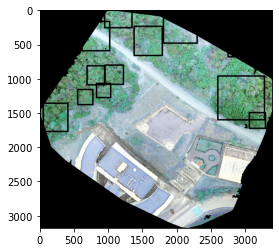

In [145]:
box = m.predict_image(path=imgpath, return_plot=True, color=(0, 0, 0), thickness=20)
plt.imshow(box)

32338683
(3177, 3393, 3)


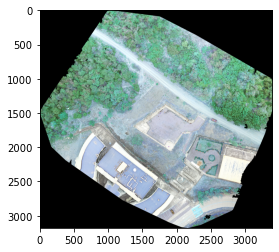

In [146]:
import numpy as np
import cv2
img = cv2.imread(imgpath)
print(img.size)
print(img.shape)
img2 = 255*np.ones(img.shape,np.uint8)
plt.imshow(img)
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


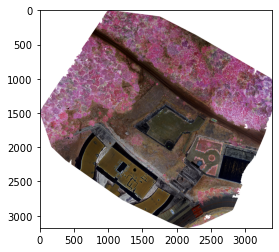

In [147]:
res = cv2.subtract(img2,img)
plt.imshow(res)
plt.show()

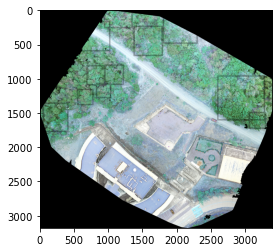

In [148]:
dst = cv2.addWeighted (img,0.7,box,0.3,0)
plt.imshow(dst)
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

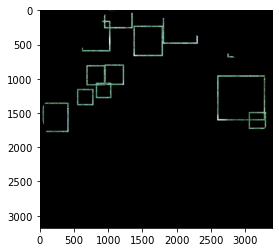

In [149]:
resA = cv2.subtract(img,box)
plt.imshow(resA)
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

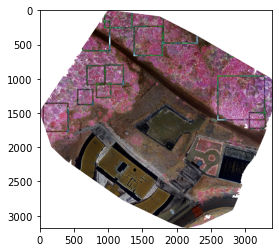

In [150]:
res1 = cv2.absdiff(res,resA)
plt.imshow(res1)
plt.show()

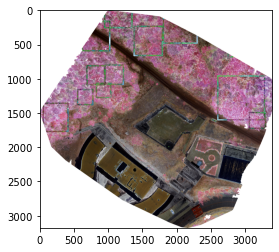

In [151]:
kernel = np.ones((5,5),np.uint8)
cierre = cv2.morphologyEx(res1, cv2.MORPH_CLOSE, kernel)
plt.imshow(cierre)
plt.show()

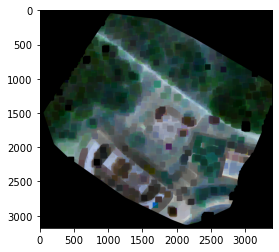

In [152]:
kernel = np.ones((5,5), np.uint8)  
img_erosion = cv2.erode(img, kernel, iterations=20)  
img_dilation = cv2.dilate(img, kernel, iterations=20)  
plt.imshow(img_erosion)
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

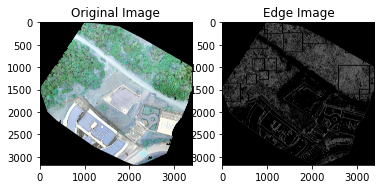

In [177]:
edges = cv2.Canny(box,198,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image')
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')
plt.show()

In [160]:
cv2.imwrite('forest.tif',edges)

True

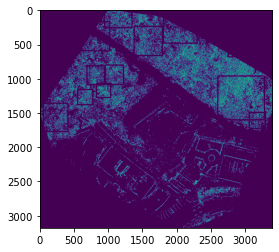

In [190]:
kernel = np.ones((3,3),np.uint8)
#erosion = cv2.dilate(edges,kernel,iterations = 2)
erosion = cv2.morphologyEx(edges, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(erosion)
plt.show()

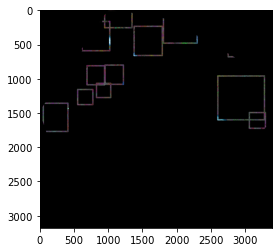

In [154]:
res2 = cv2.absdiff(res1,res)
plt.imshow(res2)
plt.show()

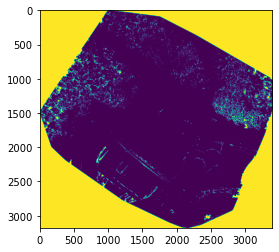

In [203]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,200,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh)
plt.show()